In [195]:
# On se place dans trois villes de France qui contiennent suffisamment de données
# J'ai choisi Nantes, Lyon, Marseille
# Le but est dans un premier temps est d'effectuer une première analyse des données
# Les données sont dèja filtrées selon les paramètres suivant :

# - Suppression des colonnes vides
# - Suppression des doublons (lignes identiques)
# - On garde uniquement les ventes sur des Maisons et Appartements
# - Afin de s'assurer de la qualité des données, je choisis de supprimer les ventes de moins de 10 000€
# - Choix d'une ville, car les prix son très dépendant de la situation géographique d'un bien
# - Je choisis également de supprimer les ventes de plus de 3 000 000€ (car trop particulier comme vente)
# - Conversion en float et on garde uniquement les colonnes que j'ai estimé pertinentes 

In [196]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

# On importe les données afin de les analyser visuellement 
nantes = pd.read_csv('Projet/Data/NANTES_44_data.csv')
lyon = pd.read_csv('Projet/Data/LYON_69_data.csv')
marseille = pd.read_csv('Projet/Data/MARSEILLE_13_data.csv')

In [197]:
# Analyse des données
def analyse(data) :
    
    #Describe
    print(data['Valeur fonciere'].describe())
        
    # Probability plot
    res = stats.probplot(data['Valeur fonciere'], plot=plt)
    
    # Top 10 HeatMap
    matrice = data.corr()
    k = 10 # Nombre de variables à garder dans la HeatMap
    cols = matrice.nlargest(k, 'Valeur fonciere')['Valeur fonciere'].index
    cm = np.corrcoef(data[cols].values.T)
    sns.set(font_scale=1.0)
    f, ax = plt.subplots(figsize=(12, 6))
    hm = sns.heatmap(cm, annot=True, square=True, 
                     annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)

count    1.437700e+04
mean     2.159338e+05
std      1.863696e+05
min      1.000000e+04
25%      1.000000e+05
50%      1.570000e+05
75%      2.650000e+05
max      1.500000e+06
Name: Valeur fonciere, dtype: float64


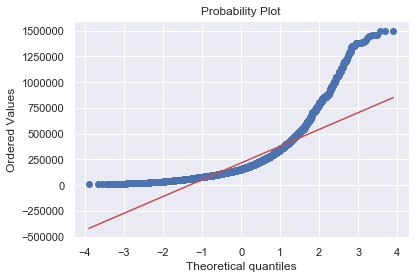

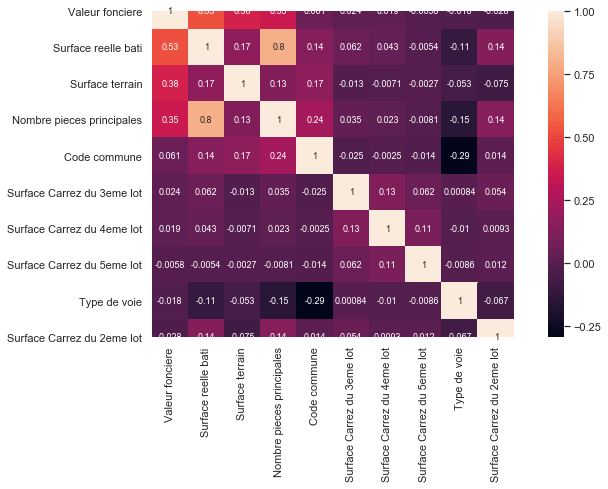

In [198]:
# Faire l'analyse des trois villes

analyse(marseille)
#analyse(nantes)
#analyse(lyon)

In [199]:
# Visualition de la répartition de la valeur fonciere
def visualisation(data) :
    sns.distplot(data['Valeur fonciere'] , fit=norm)

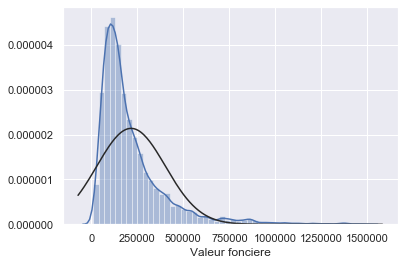

In [200]:
# On cherche à obtenir la répartition la plus normal possible
# Car si les données sont trop éparses, l'algorithme ne peut pas apprendre correctement 

visualisation(marseille)
#visualisation(nantes)
#visualisation(lyon)

In [201]:
# Une technique pour normaliser cela est d'utiliser la fonction log(1+x) (Filtre passe bas)

def normalize(data) :
    df = data.copy()
    # Application de la fonction
    df["Valeur fonciere"] = np.log1p(df["Valeur fonciere"])

    # Check the new distribution 
    sns.distplot(df['Valeur fonciere'] , fit=norm)
    


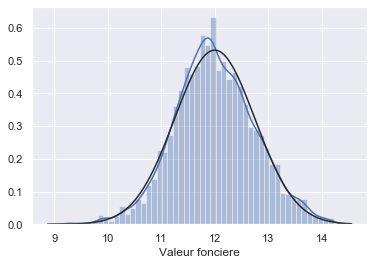

In [202]:
# Maintenant on peut regarder la nouvelle distribution

normalize(marseille)
#normalize(nantes)
#normalize(lyon)

In [203]:
# C'est donc pour cela que j'ai appliqué la fonction log(1+X)

# On a alors ces données ci dessous avec la valeur fonciere normalisée 
nantes_normalised = pd.read_csv('Projet/TrainingData/NANTES_44_training_data.csv')
lyon_normalised = pd.read_csv('Projet/TrainingData/LYON_69_training_data.csv')
marseille_normalised = pd.read_csv('Projet/TrainingData/MARSEILLE_13_training_data.csv')

count    14377.000000
mean        11.998576
std          0.750292
min          9.210440
25%         11.512935
50%         11.964007
75%         12.487489
max         14.220976
Name: Valeur fonciere, dtype: float64


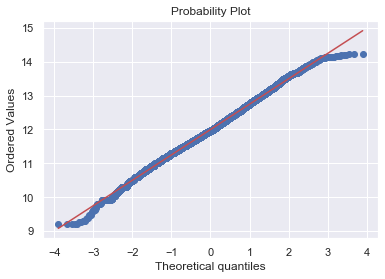

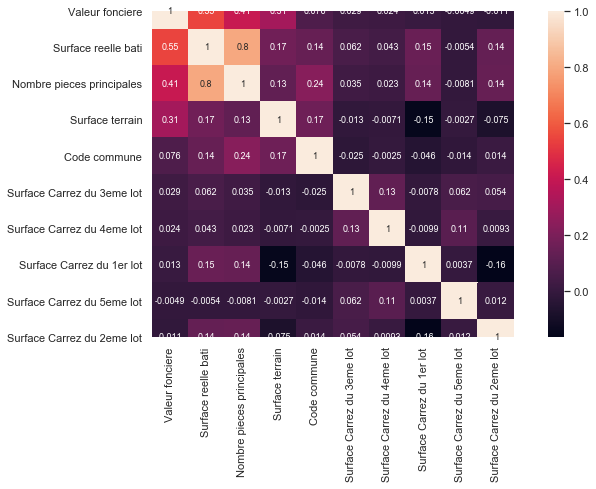

In [204]:
# Faire l'analyse des trois villes normalisés

analyse(marseille_normalised)
#analyse(nantes_normalised)
#analyse(lyon_normalised)

In [205]:
# Chargement des données de l'apprentissage du nn
results_nantes = pd.read_csv("Projet/Results/NN_results_NANTES_44.csv")
results_lyon = pd.read_csv("Projet/Results/NN_results_LYON_69.csv")
results_marseille = pd.read_csv("Projet/Results/NN_results_MARSEILLE_13.csv")

In [206]:
# Analyse de l'apprentissage du réseau de neurones
def analyze_nn_training(data) :
    print("")
    print(" Mean val_mae = {}".format(sum(data['val_mae'])/len(data['val_mae'])))
    print(" Mean mae = {}".format(sum(data['mae'])/len(data['mae'])))
    plt.plot(data['val_mae'])
    plt.plot(data['mae'])
    plt.legend(['val_mae','mae'])


 Mean val_mae = 0.40133387625217437
 Mean mae = 0.3848771893978119


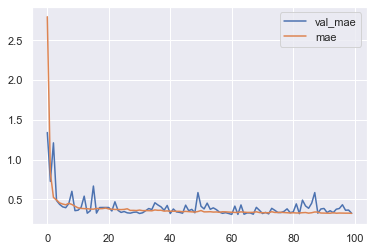

In [209]:
analyze_nn_training(results_marseille)
#analyze_nn_training(results_nantes)
#analyze_nn_training(results_lyon)